In [23]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import IntSlider as iSlider
from ipywidgets import FloatSlider as fSlider
import seaborn as sns
np.random.seed(42)

In [9]:
def display_conf(y_test, y_preds):
  ax= plt.subplot()
  cm = confusion_matrix(y_test, y_preds)
  sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);


# Polynomial Regression

`make_pipeline` is a function in scikit-learn that allows you to create a pipeline of several data preprocessing and modeling steps.
### what is a pipeline ?
In a pipeline, the data is first transformed or preprocessed using one or more steps, and then fed to a machine learning model for prediction or classification. Pipelines are useful because they help to automate the data preprocessing and modeling process, and ensure that the same steps are applied consistently to both the training and test data. Additionally, pipelines can be used to search over hyperparameters using cross-validation, which can improve the generalization performance of the model.

## Polynomial Regression 

Polynomial regression is a type of regression analysis in which the relationship between the independent variable X and the dependent variable y is modeled as an nth-degree polynomial function. The general equation of polynomial regression is:

`y = β0 + β1x + β2x^2 + ... + βnx^n + ε`

In [13]:
from sklearn.model_selection import train_test_split

@widgets.interact(
  degree = iSlider(value=1, min = 1, max = 25, step=1),
  n_points = iSlider(value=100, min = 100, max = 1000, step=50),
  spread = iSlider(value=10, min = 10, max = 30, step=2),
  zoom = iSlider(value=0, min = 0, max = 5, step=1),
  test_size = fSlider(value=0.2, min=0.1, max=0.5, step=0.1)
)
def plot(degree, n_points, spread, test_size, zoom):
  np.random.seed(42)
  #Data Creation
  X = np.sort(spread * np.random.rand(n_points, 1), axis=0)
  y = np.sin(X).ravel() + np.random.randn(n_points) * 0.1
  X_extra = np.sort(2.2*spread * np.random.rand(n_points, 1), axis=0)
  X_extra = X_extra[int(X_extra.size*0.5):]
  y_extra = np.sin(X_extra).ravel() + np.random.randn(X_extra.size) * 0.1
  
  #Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  
  #Model training on training set
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  model.fit(X_train, y_train)
  
  #Model evaluation on training and testing sets
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  test2_score = model.score(X_extra, y_extra)
  
  #Model prediction on test set
  y_pred = model.predict(X_test)
  
  #Plotting
  X_plot = np.linspace(-zoom, spread + zoom, n_points)[:, np.newaxis]
  y_pred = model.predict(X_plot)
  fig, ax = plt.subplots()
  ax.scatter(X_train, y_train, label='Training data')
  ax.scatter(X_test, y_test, label='Testing Region 1')
  ax.scatter(X_extra, y_extra, label='Testing Region 2')

  ax.plot(X_plot, y_pred, color='red', label='Polynomial fit')
  ax.set_title('Polynomial regression (degree=%d)' % degree)
  ax.set_xlabel('X')
  ax.set_ylabel('y')
  ax.legend()
  
  #Print scores
  print('Training score:', train_score)
  print('Test Region 1 score:', test_score)
  print('Test Region 2 score:', test2_score)

interactive(children=(IntSlider(value=1, description='degree', max=25, min=1), IntSlider(value=100, descriptio…

# Bias And Variance Tradeoff
In machine learning, the bias-variance tradeoff is a fundamental concept that relates to the problem of overfitting and underfitting.

Underfitting occurs when a model is too simple, and it fails to capture the underlying relationships present in the data. This results in high bias and low variance. In other words, the model is too rigid and inflexible, and it cannot generalize well to new data.

Overfitting occurs when a model is too complex and fits the training data too closely, including the noise in the data. This results in low bias and high variance. In other words, the model is too flexible and can adapt to the training data so well that it fails to generalize well to new data.

The goal of a good machine learning model is to find the right balance between bias and variance. The tradeoff between bias and variance is a fundamental concept in machine learning, and it is essential to ensure that the model is neither too simple nor too complex.

To overcome overfitting, one can use techniques such as regularization, which penalizes large coefficients in the model, or use simpler models with fewer features. On the other hand, to overcome underfitting, one can use more complex models or increase the number of features in the model.

In summary, finding the right balance between bias and variance is crucial in machine learning to build models that can generalize well to new data.

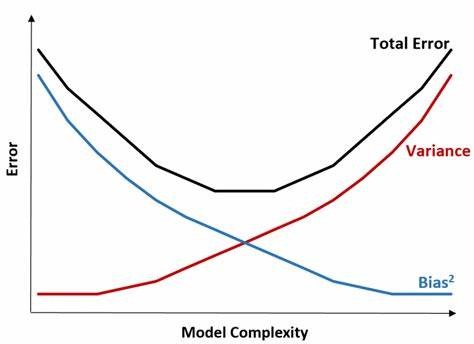

interactive visualizations are done using [IPYwidgets](https://ipywidgets.readthedocs.io/en/latest/)


### Cross-validation
a technique for estimating the performance of a model on new data by dividing the available data into subsets for training and testing. Common types of cross-validation include k-fold cross-validation, stratified k-fold cross-validation, and leave-one-out cross-validation.

In [19]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
model = LinearRegression()
kfold = KFold(n_splits=5)
scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    scores.append(score)
print("R-squared scores:", (scores))
print("Mean R-squared scores:", np.mean(scores))
print("STD R-squared scores:", np.std(scores))

R-squared scores: [0.429556153825838, 0.5225993866099365, 0.48268054134528215, 0.4264977611104024, 0.5502483366517519]
Mean R-squared scores: 0.4823164359086422
STD R-squared scores: 0.04926857751190373


## Evaluation Metrics


There are several metrics that can be used to measure the performance of a multiclass classifier, depending on the specific problem and the priorities of the stakeholders. Here are a few commonly used metrics:

### Accuracy
This metric measures the proportion of correctly classified instances out of all instances in the dataset. While accuracy can be a useful metric, it can be misleading in imbalanced datasets where the classes are not equally represented.

### Precision
This metric measures the proportion of true positives (correctly classified instances of a particular class) out of all instances classified as belonging to that class. It is a useful metric when the goal is to minimize false positives.

### Recall (sensitivity)
This metric measures the proportion of true positives out of all instances that actually belong to that class. It is a useful metric when the goal is to minimize false negatives.

### F1-score
This is the harmonic mean of precision and recall, and provides a balanced measure of the two. It is a useful metric when the goal is to balance precision and recall.

### Confusion matrix
A confusion matrix provides a detailed breakdown of the model's predictions and can be used to calculate the above metrics. It is a table that summarizes the number of true positive, true negative, false positive, and false negative predictions for each class.

### ROC curve
Receiver Operating Characteristic (ROC) curves and Area Under the Curve (AUC) are used to evaluate the performance of binary classification models. 
<br>ROC curves show the trade-off between sensitivity and specificity, while AUC summarizes the overall performance of the model across different decision thresholds.

### AUC (Not the american University In Cairo)
(area under the ROC curve): This metric quantifies the overall performance of the classifier across all possible threshold values. AUC ranges between 0 and 1, with 1 indicating perfect performance and 0.5 indicating random guessing.

In [24]:
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2) # binary classification dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba) # false positive rate, true positive rate, and threshold values for ROC curve
auc_score = roc_auc_score(y_test, y_proba)

@widgets.interact(
  index = slider(value=0, min = 0, max = len(thresholds)-1, step=1)
)
def confusion(index):
  print("Threshold = ",thresholds[index])
  display_conf(y_test, y_proba>thresholds[index])
  plt.show()
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score )
  plt.scatter([fpr[index]], [tpr[index]], label = "thresh" )
  plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

interactive(children=(IntSlider(value=0, description='index', max=43), Output()), _dom_classes=('widget-intera…

In [35]:
def f(x):
  return 0.5*x + 5

In [36]:
f(5)

7.5

# MultiClass Classification

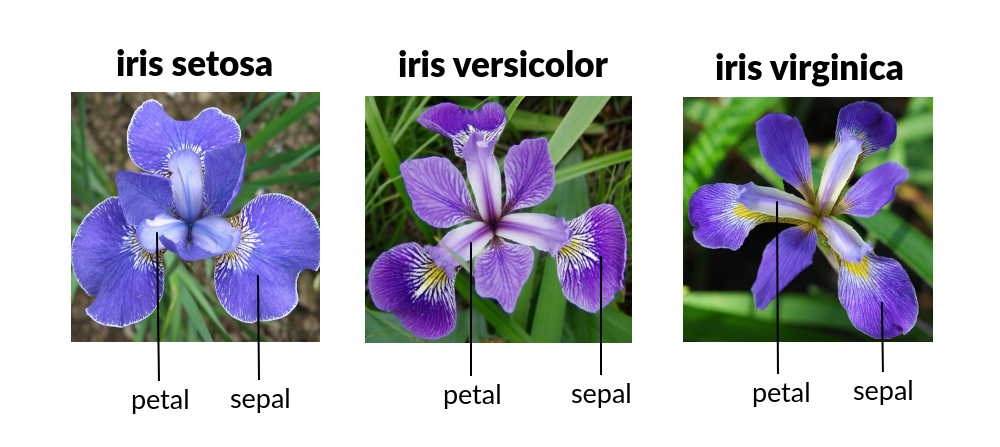

In [30]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
cols = iris.feature_names
data = pd.DataFrame(dict(zip(cols, X.T)))
names = iris.target_names
data['class'] = y
data['class'] = data['class'].replace(dict(zip([0,1,2],names)))
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Tree Models

#### Decision Tree
A decision tree is a tree-like model where each node represents a feature, each branch represents a decision, and each leaf node represents a class label or a continuous value. The decision tree algorithm splits the data at each node based on the feature that provides the maximum information gain, which is a measure of how much splitting the data at a particular feature will reduce the impurity of the resulting subsets. Decision trees are easy to interpret and visualize, but they are prone to overfitting and instability.<br>
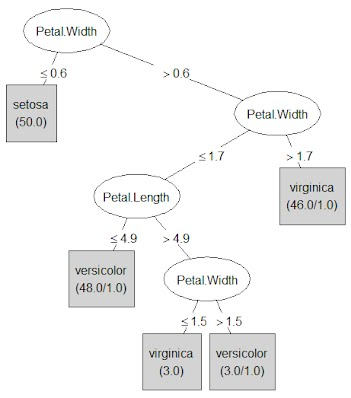

#### Random Forest 
Random forest, on the other hand, is an ensemble algorithm that combines multiple decision trees to improve the accuracy and reduce the overfitting of a single decision tree. It creates a forest of decision trees by randomly selecting a subset of features and a subset of data for each tree, and each tree votes on the final prediction. Random forest also uses techniques like bagging and feature importance to improve the robustness of the model.<br>
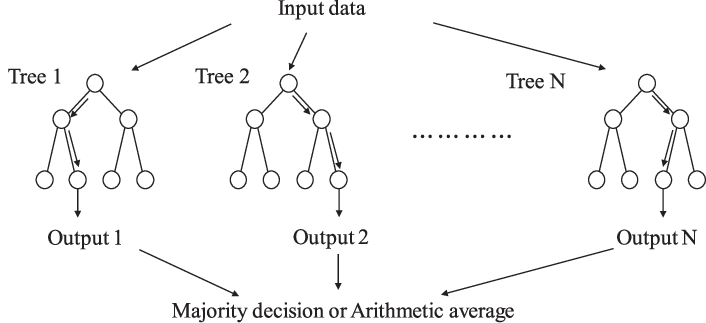

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
rforest_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

y_pred1 = dtree_model.predict(X_test)
y_pred2 = rforest_model.predict(X_test)
pd.DataFrame({"Actual":y_test,"DecisionTree":y_pred1, "RandomForest":y_pred2 })

,Actual,DecisionTree,RandomForest
0,2,2,2
1,1,1,1
2,0,0,0
3,2,2,2
4,0,0,0
5,2,2,2
6,0,0,0
7,1,1,1
8,1,1,1
9,1,1,1


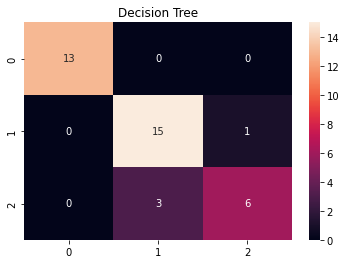

In [32]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True)
plt.title("Decision Tree"); 

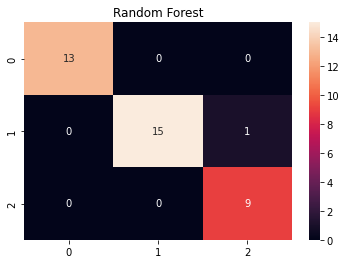

In [33]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True)
plt.title("Random Forest"); 

In [34]:
f1_1 = f1_score(y_test, y_pred1, average='weighted')
f1_2 = f1_score(y_test, y_pred2, average='weighted')
print("F1-score for Decision Tree: ", f1_1)
print("F1-score for Random Forest: ", f1_2)

F1-score for Decision Tree:  0.8912538699690402
F1-score for Random Forest:  0.9739522830846216


In summary, decision tree is a simple yet powerful algorithm that can suffer from overfitting, while random forest is an ensemble of decision trees that can improve the accuracy and stability of the model.
